In [1]:
# Data manipulation
from sklearn.preprocessing import LabelEncoder
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import catboost as cb
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from pycaret.regression import *

# Model Evaluations
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def Label_Encoder(DataFrame):
    le = LabelEncoder()
    for col in DataFrame.columns:
        if(DataFrame[col].dtype == 'object'):
            DataFrame.loc[:,col] = le.fit_transform(DataFrame.loc[:,col])
            
            

#### INDIA

In [2]:
Ind_train = pd.read_csv (r'C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\India_Train-Processed.csv')
Ind_test = pd.read_csv (r'C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\India_Test-Processed.csv')

Label_Encoder(Ind_train)
Label_Encoder(Ind_test)
Ind_train = Ind_train.drop(["Year"], axis=1)
Ind_test = Ind_test.drop(["Year"], axis=1)

columns_to_drop = [col for col in Ind_train.columns if col not in top_20_features]
india_features = Ind_train.drop(columns_to_drop, axis=1)

#top_20_features

NameError: name 'top_20_features' is not defined

In [2]:



import pandas as pd

# Assuming you already have the DataFrame 'df' and the top 20 column list 'top_20_columns'

# Create a list of columns to drop
columns_to_drop = [col for col in df.columns if col not in top_20_columns]

# Drop the columns from the DataFrame
df_dropped = df.drop(columns_to_drop, axis=1)

columns_to_drop = [col for col in df.columns if col != target_variable_column_name and col not in top_20_columns]


In [3]:
india_features = Ind_train.drop(["COTTON YIELD (Kg per ha)"], axis=1)
india_target = Ind_train["COTTON YIELD (Kg per ha)"]
Ind_test = Ind_test.drop(['COTTON YIELD (Kg per ha)'],axis=1)

X_train, X_val, y_train, y_val = train_test_split(india_features, india_target, test_size=0.15, random_state=0)

In [4]:
model_IND3 = RandomForestRegressor(random_state=0)
model_IND3.fit(X_train,y_train) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(model_IND3.score(X_train, y_train)))

print('-------------'*9)
y_pred_val3 = model_IND3.predict(X_val)
mse_india = mean_squared_error(y_val, y_pred_val3)
print(f"India Validation MSE: {mse_india}") #(ADJUSTED PARAMETERS)(Y)

Accuracy of Random Forest Regressor on training set: 0.95
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 3174620.882395158


In [5]:
model_IND_py3 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.1,
                      min_samples_leaf=4, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                      oob_score=False, random_state=12330, verbose=0,
                      warm_start=False)
model_IND_py3.fit(X_train,y_train) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(model_IND_py3.score(X_train, y_train)))

print('-------------'*9)
y_pred_val_py3 = model_IND_py3.predict(X_val)
mse_india = mean_squared_error(y_val, y_pred_val_py3)
print(f"India Validation MSE: {mse_india}")
#3045823.9248801265, random_state=12330, n_estimators=80, max_depth=11, min_samples_leaf=4 (ADJUSTED PARAMETERS)(Y)

Accuracy of Random Forest Regressor on training set: 0.89
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 3045823.9248801265


In [6]:
model_IND4 = CatBoostRegressor(random_state=123,logging_level='Silent')
model_IND4.fit(X_train,y_train) 
print('Accuracy of Cat Boost Regressor on training set: {:.2f}'
     .format(model_IND4.score(X_train, y_train)))
print('-------------'*9)
y_pred_val4 = model_IND4.predict(X_val)
mse_india = mean_squared_error(y_val, y_pred_val4)
print(f"India Validation MSE: {mse_india}")

#2672401.124733912; random_state=123 (ADJUSTED PARAMETERS)(Y)

Accuracy of Cat Boost Regressor on training set: 0.99
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 2672401.124733912


Text(0.5, 1.0, 'Feature Importance')

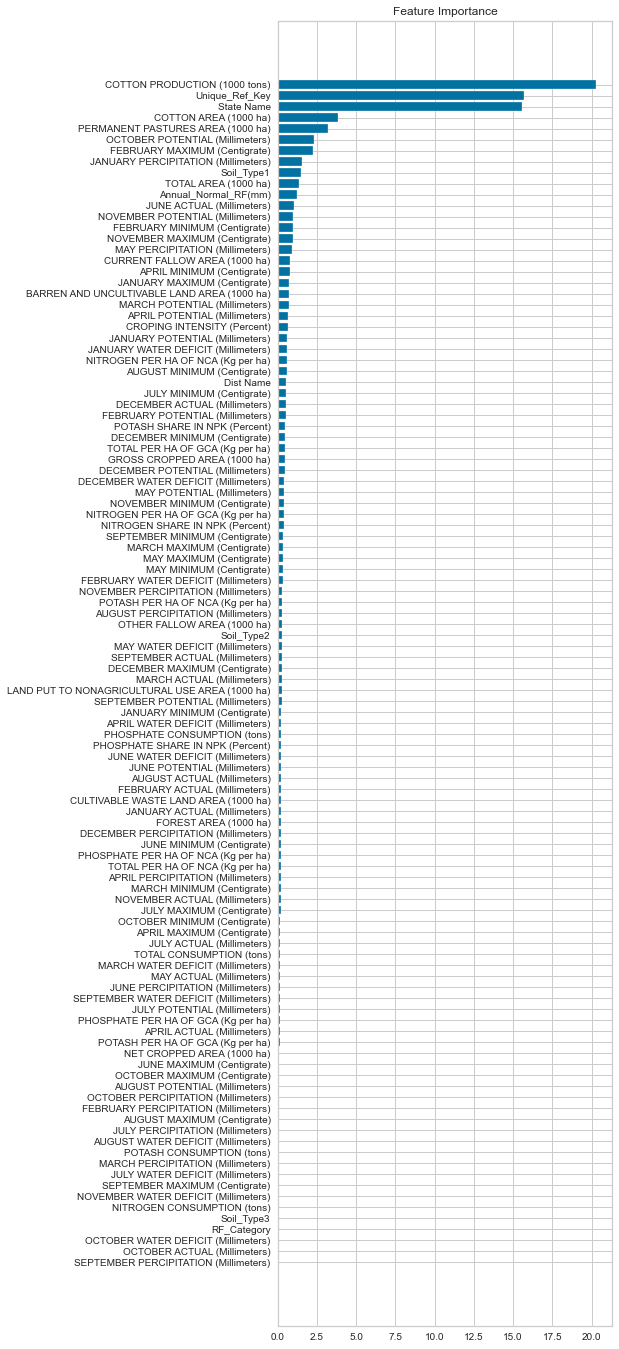

In [147]:

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


from catboost import CatBoostRegressor, Pool

feature_importance = model_IND4.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(6, 24))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')


In [155]:
feature_importances = model_IND4.get_feature_importance()
feature_importance_df = pd.DataFrame({'Feature': Ind_train .columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_20_features = feature_importance_df.head(20)


ValueError: All arrays must be of the same length

In [154]:
top_20_features

Feature  Importance
4                 COTTON PRODUCTION (1000 tons)   20.311746
2                                Unique_Ref_Key   15.719046
0                                    State Name   15.559254
3                         COTTON AREA (1000 ha)    3.850618
87            PERMANENT PASTURES AREA (1000 ha)    3.217415
79              OCTOBER POTENTIAL (Millimeters)    2.293477
35                FEBRUARY MAXIMUM (Centigrate)    2.264580
8           JANUARY PERCIPITATION (Millimeters)    1.566565
5                                    Soil_Type1    1.469822
82                         TOTAL AREA (1000 ha)    1.393604
20                         Annual_Normal_RF(mm)    1.206084
63                    JUNE ACTUAL (Millimeters)    1.020160
80             NOVEMBER POTENTIAL (Millimeters)    0.988693
23                FEBRUARY MINIMUM (Centigrate)    0.973394
44                NOVEMBER MAXIMUM (Centigrate)    0.955036
12              MAY PERCIPITATION (Millimeters)    0.888547
89                CURRENT FALLOW AREA (1000 ha)    0.815293
25                   APRIL MINIMUM (Centigrate)    0.801934
34                 JANUARY MAXIMUM (Centigrate)    0.758680
84  BARREN AND UNCULTIVABLE LAND AREA (1000 ha)    0.748545

In [7]:
model_IND5 = XGBRegressor(random_state=0)
model_IND5.fit(X_train,y_train) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(model_IND5.score(X_train, y_train)))
print('-------------'*9)
y_pred_val5 = model_IND5.predict(X_val)
mse_india = mean_squared_error(y_val, y_pred_val5)
print(f"India Validation MSE: {mse_india}")
# (ADJUSTED PARAMETERS)(Y)

Accuracy of XGB Regressor on training set: 1.00
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 3350740.685599213


In [8]:
model_IND_py5 = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.027, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=4,
             monotone_constraints='()', n_estimators=220,
             n_jobs=-1, num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=12360, reg_alpha=1e-06)
model_IND_py5.fit(X_train,y_train) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(model_IND_py5.score(X_train, y_train)))
print('-------------'*9)
y_pred_val_py5 = model_IND_py5.predict(X_val)
mse_india = mean_squared_error(y_val, y_pred_val_py5)
print(f"India Validation MSE: {mse_india}")

#3553161.416419843; random_state=12360;(ADJUSTED PARAMETERS)

Accuracy of XGB Regressor on training set: 0.84
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 3553161.416419843


In [9]:
model_IND6 = LGBMRegressor(random_state=0)
model_IND6.fit(X_train,y_train) 
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(model_IND6.score(X_train, y_train)))
print('-------------'*9)
y_pred_val6 = model_IND6.predict(X_val)
mse_india = mean_squared_error(y_val, y_pred_val6)
print(f"India Validation MSE: {mse_india}")

#(ADJUSTED PARAMETERS)Y

Accuracy of LGBM Regressor on training set: 0.96
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 3291094.217765907


In [10]:
model_IND_py6 = LGBMRegressor(bagging_fraction=1.0, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.256, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=30, n_jobs=-1, num_leaves=70, objective=None,
              random_state=12, reg_alpha=0.7, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model_IND_py6.fit(X_train,y_train) 
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(model_IND_py6.score(X_train, y_train)))
print('-------------'*9)
y_pred_val_py6 = model_IND_py6.predict(X_val)
mse_india = mean_squared_error(y_val, y_pred_val_py6)
print(f"India Validation MSE: {mse_india}")

#2611332.859457254; random_state=12;n_estimators=30;min_child_samples=20;reg_lambda=3 (ADJUSTED PARAMETERS) Y

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
Accuracy of LGBM Regressor on training set: 0.94
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 2611332.859457254


In [11]:
model_IND7 = GradientBoostingRegressor(random_state=0)
model_IND7.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(model_IND7.score(X_train, y_train)))
print('-------------'*9)
y_pred_val7 = model_IND7.predict(X_val)
mse_india = mean_squared_error(y_val, y_pred_val7)
print(f"India Validation MSE: {mse_india}")

#(ADJUSTED PARAMETERS)Y

Accuracy of Gradient Boosting Regressor on training set: 0.92
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 3619181.3370778286


In [12]:
model_IND_py7 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.129, loss='squared_error',
                          max_depth=8, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=230, n_iter_no_change=None,
                          random_state=12330, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
model_IND_py7.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(model_IND_py7.score(X_train, y_train)))
print('-------------'*9)
y_pred_val_py7 = model_IND_py7.predict(X_val)
mse_india = mean_squared_error(y_val, y_pred_val_py7)
print(f"India Validation MSE: {mse_india}")

#3004990.8052613963 (Random 12330); n_estimators=230; max_depth=8 (ADJUSTED PARAMETERS) Y

Accuracy of Gradient Boosting Regressor on training set: 1.00
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 3004990.8052613963


In [13]:
model_IND10 = HistGradientBoostingRegressor(random_state =0)
model_IND10.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(model_IND10.score(X_train, y_train)))
print('-------------'*9)
y_pred_val10 = model_IND10.predict(X_val)
mse_india = mean_squared_error(y_val, y_pred_val10)
print(f"India Validation MSE: {mse_india}")

#3401217.7210005284;random_state =0 (ADJUSTED PARAMETERS) Y

Accuracy of Hist Gradient Boosting Regressor on training set: 0.96
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 3401217.7210005284


In [14]:
from sklearn.ensemble import ExtraTreesRegressor
model_IND11 = ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_samples_leaf=4,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=8, n_jobs=-1, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)
model_IND11.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(model_IND11.score(X_train, y_train)))
print('-------------'*9)
y_pred_val11 = model_IND11.predict(X_val)
mse_india = mean_squared_error(y_val, y_pred_val11)
print(f"India Validation MSE: {mse_india}")

# 3239554.1114458046; random=0 (ADJUSTED PARAMETERS) #Y

Accuracy of Hist Gradient Boosting Regressor on training set: 0.79
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 3239554.1114458046


In [15]:
x = np.array(Ind_test)
y_pred_IND3 = model_IND3.predict(x) #3174620.882395158
y_pred_IND_py3 = model_IND_py3.predict(x) #3201964.509920481
y_pred_IND4 = model_IND4.predict(x) #3104373.1260361834
y_pred_IND5 = model_IND5.predict(x) #3350740.685599213
y_pred_IND_py5 = model_IND_py5.predict(x) #3752638.272154247
y_pred_IND6 = model_IND6.predict(x) #3291094.217765907
y_pred_IND_py6 = model_IND_py6.predict(x) #2936898.3094715592
y_pred_IND7 = model_IND7.predict(x) #3619181.3370778286
y_pred_IND_py7 = model_IND_py7.predict(x) #3232378.4334981865
y_pred_IND10 = model_IND10.predict(x) #3401217.7210005284
y_pred_IND11 = model_IND11.predict(x) #3239554.1114458046

In [16]:
submission_india=pd.DataFrame(y_pred_IND_py6,columns=['COTTON YIELD (Kg per ha)'])

In [17]:
Ind_test = pd.read_csv (r'C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\India_Test-Processed.csv')
Ind_test1 = Ind_test["Year"]

Final_submission_IND = pd.concat([Ind_test1,submission_india],axis=1) 

#### USA

In [18]:
usa_train = pd.read_csv(r"C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\USA_train.csv")
usa_test = pd.read_csv(r"C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\USA_test.csv")

usa_train=usa_train.fillna("0")
usa_test=usa_test.fillna("0")

usa_train= usa_train.astype(float, errors='ignore')
usa_test= usa_test.astype(float, errors='ignore')

usa_train=usa_train.drop(['Year'], axis=1)

usa_train=usa_train.drop(['State','Planted (1000 Acres)',"Harvested (1000 Acres)"], axis=1)
usa_test=usa_test.drop(['State','Planted (1000 Acres)',"Harvested (1000 Acres)",'Yield (Pounds/ Harvested Area)','Year'], axis=1)

In [19]:
usa_features = usa_train.drop(["Yield (Pounds/ Harvested Area)"], axis=1)
usa_target = usa_train["Yield (Pounds/ Harvested Area)"]

# Split the data into training set and validation set
X_train1, X_val1, y_train1, y_val1 = train_test_split(usa_features, usa_target, test_size=0.15, random_state=0)

In [20]:
USAmodel3 = RandomForestRegressor(random_state=0)
USAmodel3.fit(X_train1,y_train1) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(USAmodel3.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val3 = USAmodel3.predict(X_val1)
mse_USA = mean_squared_error(y_val1, y_pred_val3)
print(f"India Validation MSE: {mse_USA}") #(ADJUSTED PARAMETERS) y

Accuracy of Random Forest Regressor on training set: 0.94
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 39343.33269761905


In [21]:
USAmodel_py3 = RandomForestRegressor(n_jobs=-1, random_state=123)
USAmodel_py3.fit(X_train1,y_train1) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(USAmodel_py3.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val_py3 = USAmodel_py3.predict(X_val1)
mse_USA = mean_squared_error(y_val1, y_pred_val_py3)
print(f"India Validation MSE: {mse_USA}") #(ADJUSTED PARAMETERS) y

Accuracy of Random Forest Regressor on training set: 0.93
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 40979.094763095236


In [22]:
USAmodel_hyper3 = RandomForestRegressor(random_state=0
                                       ,n_estimators = 7000, min_samples_split = 5
                                        , min_samples_leaf = 2
                                        , max_features = 'auto'
                                        , max_depth = 90, bootstrap = True)
USAmodel_hyper3.fit(X_train1,y_train1) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(USAmodel_hyper3.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val_hyper3 = USAmodel_hyper3.predict(X_val1)
mse_USA = mean_squared_error(y_val1, y_pred_val_hyper3)
print(f"India Validation MSE: {mse_USA}")

#38667.83232486828, RS= 0; n_estimators = 7000; max_depth = 90, #(ADJUSTED PARAMETERS); y

Accuracy of Random Forest Regressor on training set: 0.91
---------------------------------------------------------------------------------------------------------------------
India Validation MSE: 38667.83232486828


In [23]:
USAmodel4 = CatBoostRegressor(random_state=123,logging_level='Silent')
USAmodel4.fit(X_train1,y_train1) 
print('Accuracy of Cat Boost Regressor on training set: {:.2f}'
     .format(USAmodel4.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val4 = USAmodel4.predict(X_val1)
mse_USA = mean_squared_error(y_val1, y_pred_val4)
print(f"USA Validation MSE: {mse_USA}")

#41282.319448854716, RS =123, #(ADJUSTED PARAMETERS) y

Accuracy of Cat Boost Regressor on training set: 1.00
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE: 41282.319448854716


In [24]:
USAmodel5 = XGBRegressor(random_state=0)
USAmodel5.fit(X_train1,y_train1) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(USAmodel5.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val5 = USAmodel5.predict(X_val1)
mse_USA = mean_squared_error(y_val1, y_pred_val5)
print(f"USA Validation MSE: {mse_USA}") #(ADJUSTED PARAMETERS) y 

Accuracy of XGB Regressor on training set: 1.00
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE: 45502.90760576562


In [25]:
USAmodel_py5 = XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3,monotone_constraints=None,
             n_estimators=290, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=123)
USAmodel_py5.fit(X_train1,y_train1) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(USAmodel_py5.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val_py5 = USAmodel_py5.predict(X_val1)
mse_USA = mean_squared_error(y_val1, y_pred_val_py5)
print(f"USA Validation MSE: {mse_USA}")

#39629.3892869922, RS= 123; n_estimators=290; (ADJUSTED PARAMETERS) y

Accuracy of XGB Regressor on training set: 1.00
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE: 39629.3892869922


In [26]:
USAmodel6 = LGBMRegressor(random_state=0)
USAmodel6.fit(X_train1,y_train1) 
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(USAmodel6.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val6 = USAmodel6.predict(X_val1)
mse_USA = mean_squared_error(y_val1, y_pred_val6)
print(f"USA Validation MSE: {mse_USA}")

# 44060.678846814124; RS = 0;  (ADJUSTED PARAMETERS) y

Accuracy of LGBM Regressor on training set: 0.98
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE: 44060.678846814124


In [27]:
USAmodel_py7 = GradientBoostingRegressor(random_state=11)
USAmodel_py7.fit(X_train1,y_train1) 
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(USAmodel_py7.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val_py7 = USAmodel_py7.predict(X_val1)
mse_USA = mean_squared_error(y_val1, y_pred_val_py7)
print(f"USA Validation MSE: {mse_USA}")

#45714.806385431024; random_state=11; (ADJUSTED PARAMETERS) y

Accuracy of Gradient Boosting Regressor on training set: 0.88
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE: 45714.806385431024


In [28]:
USAmodel10 = HistGradientBoostingRegressor(random_state =0)
USAmodel10.fit(X_train1,y_train1) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(USAmodel10.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val10 = USAmodel10.predict(X_val1)
mse_USA = mean_squared_error(y_val1, y_pred_val10)
print(f"USA Validation MSE: {mse_USA}")

#42692.99106208062; random_state = 0; (ADJUSTED PARAMETERS); y

Accuracy of Hist Gradient Boosting Regressor on training set: 0.98
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE: 42692.99106208062


In [29]:
from sklearn.ensemble import AdaBoostRegressor
USAmodel_py12 = AdaBoostRegressor(learning_rate=0.01, n_estimators=60, random_state=123)
USAmodel_py12.fit(X_train1,y_train1) 
print('Accuracy of MLPRegressor() on training set: {:.2f}'
     .format(USAmodel_py12.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val_py12 = USAmodel_py12.predict(X_val1)
mse_USA = mean_squared_error(y_val1, y_pred_val_py12)
print(f"USA Validation MSE: {mse_USA}")
#43852.835159346774; RS = 123; n_estimators=60; learning_rate=0.01; (ADJUSTED PARAMETERS) y

Accuracy of MLPRegressor() on training set: 0.62
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE: 43852.835159346774


In [30]:
from sklearn.ensemble import ExtraTreesRegressor
USAmodel_py13 = ExtraTreesRegressor(n_jobs=-1, random_state=12356)
USAmodel_py13.fit(X_train1,y_train1) 
print('Accuracy of MLPRegressor() on training set: {:.2f}'
     .format(USAmodel_py13.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val_py13 = USAmodel_py13.predict(X_val1)
mse_USA = mean_squared_error(y_val1, y_pred_val_py13)
print(f"USA Validation MSE: {mse_USA}")

#37500.39620714285; RS=12356; (ADJUSTED PARAMETERS) y

Accuracy of MLPRegressor() on training set: 1.00
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE: 37500.39620714285


In [31]:
x = np.array(usa_test)

y_pred_USA3 = USAmodel3.predict(x) #39343.33269761905
y_pred_USA_py3 = USAmodel_py3.predict(x) #40979.094763095236
y_pred_USA_hyper3 = USAmodel_hyper3.predict(x) #38667.83232486828
y_pred_USA4 = USAmodel4.predict(x) #41949.528035940086
y_pred_USA5 = USAmodel5.predict(x) #45502.90760576562
y_pred_USA_py5 = USAmodel_py5.predict(x) #39629.39419738174
y_pred_USA6 = USAmodel6.predict(x) #44060.678846814124
y_pred_USA_py7 = USAmodel_py7.predict(x) # 45714.806385431024
y_pred_USA10 = USAmodel10.predict(x) #42692.99106208062
y_pred_USA_py12 = USAmodel_py12.predict(x) #43852.835159346774
y_pred_USA_py13 = USAmodel_py13.predict(x) #38079.494503571426

In [ ]:
y_pred_IND3 = model_IND3.predict(x) #3174620.882395158
y_pred_IND_py3 = model_IND_py3.predict(x) #3201964.509920481
y_pred_IND4 = model_IND4.predict(x) #3104373.1260361834
y_pred_IND5 = model_IND5.predict(x) #3350740.685599213
y_pred_IND_py5 = model_IND_py5.predict(x) #3752638.272154247
y_pred_IND6 = model_IND6.predict(x) #3291094.217765907
y_pred_IND_py6 = model_IND_py6.predict(x) #2936898.3094715592
y_pred_IND7 = model_IND7.predict(x) #3619181.3370778286
y_pred_IND_py7 = model_IND_py7.predict(x) #3232378.4334981865
y_pred_IND10 = model_IND10.predict(x) #3401217.7210005284
y_pred_IND11 = model_IND11.predict(x) #3239554.1114458046



In [120]:
y_pred = (0.8*y_pred_IND_py6 + 0.2*y_pred_IND_py3)
submission_india=pd.DataFrame(y_pred ,columns=['COTTON YIELD (Kg per ha)'])

In [121]:
Ind_test = pd.read_csv (r'C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\India_Test-Processed.csv')
Ind_test1 = Ind_test["Year"]

Final_submission_IND = pd.concat([Ind_test1,submission_india],axis=1) 

In [122]:
#y_pred = (0.5*y_pred_USA_py13 + 0.5*y_pred_USA_hyper3) #13393169.42694
# y_pred_A = (0.7*y_pred_USA_py13 + 0.3*y_pred_USA_hyper3) #13393157.14170 (M5)
y_pred = (y_pred_USA_py13 + y_pred_USA_hyper3 + y_pred_USA_py5)/3 #13393056.30128 (M6)

In [123]:
#submission_usa=pd.DataFrame(y_pred_USA_py13,columns=['Yield (Pounds/ Harvested Area)'])
submission_usa=pd.DataFrame(y_pred,columns=['Yield (Pounds/ Harvested Area)'])

In [124]:
usa_test = pd.read_csv(r"C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\USA_test.csv")
usa_test1 = usa_test["Year"]
Final_submission_USA = pd.concat([usa_test1,submission_usa],axis=1) 

#### USA_Commodity_prices

In [118]:
commodity = pd.read_csv(r"C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\USA_Commodity_prices.csv")
commodity['Year']=pd.to_numeric(commodity['Year'])
submission_commodity=commodity[(commodity['Year']>=2003)&(commodity['Year']<=2022)]
submission_commodity=submission_commodity["Cotton_Price[Dollar/ton]"]

In [119]:
submission = pd.concat([submission_usa,submission_india,submission_commodity],axis=1) #13393179.31746; 13393169.42694

submission = submission.fillna(0)
submission.to_csv(r"C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\M10.csv",index=False)

In [113]:
print('s')

s


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

commodity = pd.read_csv (r'C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\USA_Commodity_prices - Copy.csv')
commodity_test = pd.read_csv (r'C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\USA_Commodity_prices-test.csv')
commodity.set_index('Year', inplace=True)

model = ARIMA(commodity, order=(1, 1, 0))  # ARIMA(p, d, q)
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(commodity_test))

forecast_data = pd.DataFrame({'Year': commodity_test.index, 'Forecast': forecast})
forecast_data.set_index('Year', inplace=True)


commodity_test1 = commodity_test.drop(['Cotton_Price[Dollar/ton]'],axis=1)
Final_Commodity = pd.concat([commodity_test1,forecast_data],axis=1) 

In [130]:
submission = pd.concat([submission_usa,submission_india ,forecast_data],axis=1) #13393179.31746; 13393169.42694

submission = submission.fillna(0)
submission.to_csv(r"C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\SPECIAL.csv",index=False)

In [137]:
commodity = pd.read_csv (r'C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\USA_Commodity_prices - Copy.csv')

from sklearn.metrics import mean_squared_error

commodity_features = commodity.drop(["Cotton_Price[Dollar/ton]"], axis=1)
commodity_features_target = commodity["Cotton_Price[Dollar/ton]"]

# Split the data into training set and validation set
X_train1, X_val1, y_train1, y_val1 = train_test_split(
    commodity_features, commodity_features_target, test_size=0.15, random_state=0)

commoditymodel2 = XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=123)
commoditymodel2.fit(X_train1,y_train1) 

from sklearn.ensemble import ExtraTreesRegressor
commoditymodel6 = ExtraTreesRegressor(n_jobs=-1, random_state=123)
commoditymodel6.fit(X_train1,y_train1) 



ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [138]:
commodity_test = pd.read_csv (r'C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\USA_Commodity_prices-test.csv')

commodity_test1 = commodity_test.drop(['Cotton_Price[Dollar/ton]'],axis=1)

In [139]:


x = np.array(commodity_test1)

y_pred_commo2 = commoditymodel2.predict(x)
y_pred_commo6 = commoditymodel6.predict(x)



In [141]:
y_pred = (0.6*y_pred_commo2 + 0.4*y_pred_commo6)
submission_commodity=pd.DataFrame(y_pred,columns=['Cotton_Price[Dollar/ton]'])

submission = pd.concat([submission_usa,submission_india ,submission_commodity],axis=1) #13393179.31746; 13393169.42694

submission = submission.fillna(0)
submission.to_csv(r"C:\Users\1014070\Favorites\AB\MH\Sustainability-June23\Data\SPECIAL2.csv",index=False)